# **Stock Market Real-Time Data Analysis Using Kafka | End-To-End Data Engineering Project**

Apache Kafka is a distributed event store and stream processing platform.

**Producer**: A single source of data in Kafka ecosystem

**Broker**: A node / worker or single member of the Kafka cluster. They are responsible for writing the data received from the producers

**Consumer**: User for the data

**Cluster**: Collection of brokers/Group of one or more brokers working together to satisfy Kafka production and Consumption

**Data Partition**: Kafka topics consist of one or more partitions. A partition is a log which provides ordering guarantees for all the data contained within it. Partitions are chosen by having key values



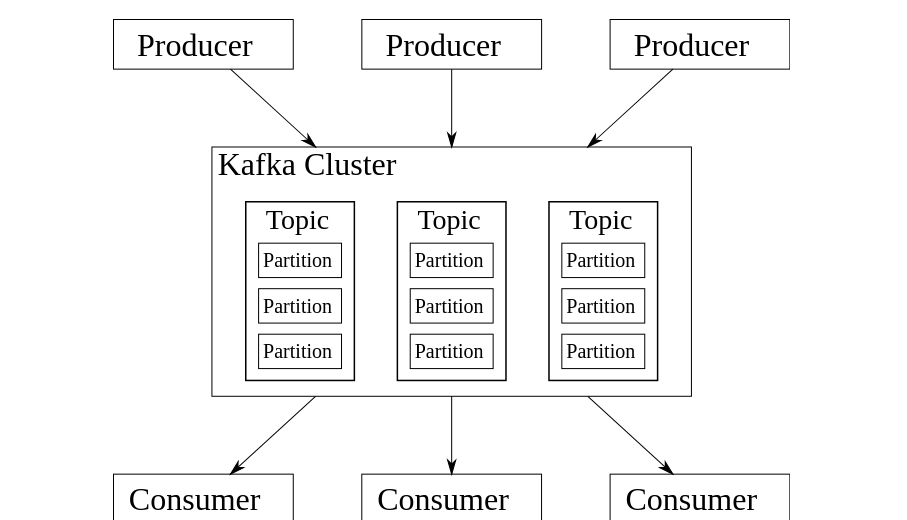

# **Zookeeper and Topics**


*   Cluster Management
*   Failure Detection and Recovery
*   Store Access Control Lists and keys
*   Enables highly reliable distributed coordination
*   Provides distributed synchronization
*   Open Source Apache Project



A **Topic** is essentially a named channel or feed where messages (also called events or records) are published by producers and consumed by consumers.  
Streams of "related" messages in Kafka.
The producer to Topic is an **N to N** relation and there can be an unlimited number of topics
Topics in Kafka are partitioned, which is when we break a topic into multiple log files that can live on separate Kafka brokers

Think of it like a mailing list or a news feed:

1. **Producers**: These are applications or systems
that send messages to a specific topic. For example, a web server might send user activity logs to a topic named "user_activity."   

2. **Consumers**: These are applications that subscribe to a topic and receive the messages published to it. For instance, a data analytics application might subscribe to the "user_activity" topic to analyze user behavior.

# **Glossary terms**


1.   Stream - An unbounded sequence of ordered , immutable data
2.   Stream Processing - Continual calculations performed on one or more streams
3.   Immutable data - Data that cannot be changed once it has been created
4.   Event - An immutable fact regarding something that has occured in our system



In [ ]:
pip install kafka-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 5.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from kafka import KafkaConsumer, KafkaProducer
from time import sleep
from json import dumps
import json

In [ ]:
producer = KafkaProducer(bootstrap_servers=['16.171.32.64:9092'],
                         value_serializer=lambda x:
                         dumps(x).encode('utf-8'))

In [ ]:
producer.send('demo_testing2', value="{'Hello':'Free The Guys'}")

In [ ]:
producer.send('demo_testing2', value="{'Hello':'Free My guys till they're all free'}")

In [ ]:

import pandas as pd

github_raw_link = "https://raw.githubusercontent.com/darshilparmar/stock-market-kafka-data-engineering-project/refs/heads/main/indexProcessed.csv"

try:
  df = pd.read_csv(github_raw_link)
  print(df.head()) # Display the first few rows of the dataframe
except Exception as e:
  print(f"An error occurred: {e}")

  Index        Date         Open         High          Low        Close  \
0   HSI  1986-12-31  2568.300049  2568.300049  2568.300049  2568.300049   
1   HSI  1987-01-02  2540.100098  2540.100098  2540.100098  2540.100098   
2   HSI  1987-01-05  2552.399902  2552.399902  2552.399902  2552.399902   
3   HSI  1987-01-06  2583.899902  2583.899902  2583.899902  2583.899902   
4   HSI  1987-01-07  2607.100098  2607.100098  2607.100098  2607.100098   

     Adj Close  Volume    CloseUSD  
0  2568.300049     0.0  333.879006  
1  2540.100098     0.0  330.213013  
2  2552.399902     0.0  331.811987  
3  2583.899902     0.0  335.906987  
4  2607.100098     0.0  338.923013  


In [ ]:
#Simulating datastreaming
while True:
  dict_stock = df.sample(1).to_dict(orient="records")[0]
  producer.send('demo_testing2', value=dict_stock)
  sleep(7)


KeyboardInterrupt: 